In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Portland & LA Climate

The climate is warming with rises in the concentrations of radiative gasses in the atmosphere (especially CO2).The most ubiquitous effect is rising average temperatures, though there are likely other effects as well, including shifts in patterns of rainfall. I'll explore climate over time in Portland and in Los Angeles, using airport weather records to do so.

In [7]:
# note T (temp in C) is annual average but PP (percipitation) is annual sum
airport_temp = pd.read_table("ap_temp.csv", sep = ",")
airport_temp.sample(5)

,Year,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR,Airport
53,2000,11.8,17.8,6.8,NaN,12.2,178.0,5.0,2.0,36.0,0.0,0.0,PDX
71,2018,13.3,19.8,8.1,698.99,11.0,163.0,9.0,8.0,27.0,0.0,0.0,PDX
17,1956,10.8,16.2,7.0,NaN,13.7,184.0,23.0,4.0,119.0,0.0,1.0,PDX
106,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAX
22,1961,12.1,17.7,8.1,NaN,13.9,196.0,8.0,5.0,124.0,0.0,2.0,PDX


Text(0, 0.5, 'Temperature (C)')

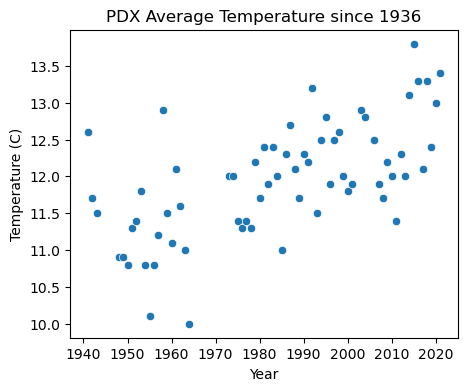

In [3]:
pdx = airport_temp[airport_temp['Airport'] == 'PDX']

plt.figure(figsize=(5,4))
sns.scatterplot(data=pdx, y = 'T', x = 'Year')
plt.title('PDX Average Temperature since 1936')
plt.ylabel('Temperature (C)')

Now I wanna create a linear model to show the increase in temperature over the years.

The quation of the linear model is T = -32.3459 + 0.0223 x Year


Text(0, 0.5, 'Average Temperature (C)')

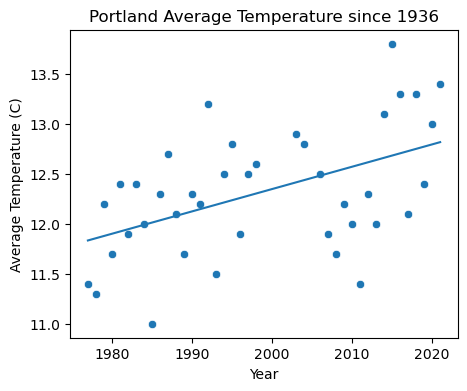

In [4]:
# linear regression can't handle Nan values so they get dropped 
pdx = pdx.dropna()

# fit the model
linear_model = LinearRegression()
linear_model.fit(pdx[['Year']], pdx[['T']])

print("The quation of the linear model is T =", round(linear_model.intercept_[0], 4), "+", round(linear_model.coef_[0][0], 4),  "x Year")

plt.figure(figsize=(5,4))
sns.scatterplot(data=pdx, y = 'T', x = 'Year')
plt.plot(pdx['Year'], linear_model.predict(pdx[['Year']]))
plt.title('Portland Average Temperature since 1936')
plt.ylabel('Average Temperature (C)')

The slope of my regression line is 0.0223 which means that the average predicted temperature change in Portland each year is $0.0223\textdegree$ C. 

In addition to temperature, climate change is also thought to be influencing patterns of precipitation. Specifically, some places might get drier and some places might get wetter.

Text(0.5, 1.0, 'PP vs T Before & After 1985 at LAX')

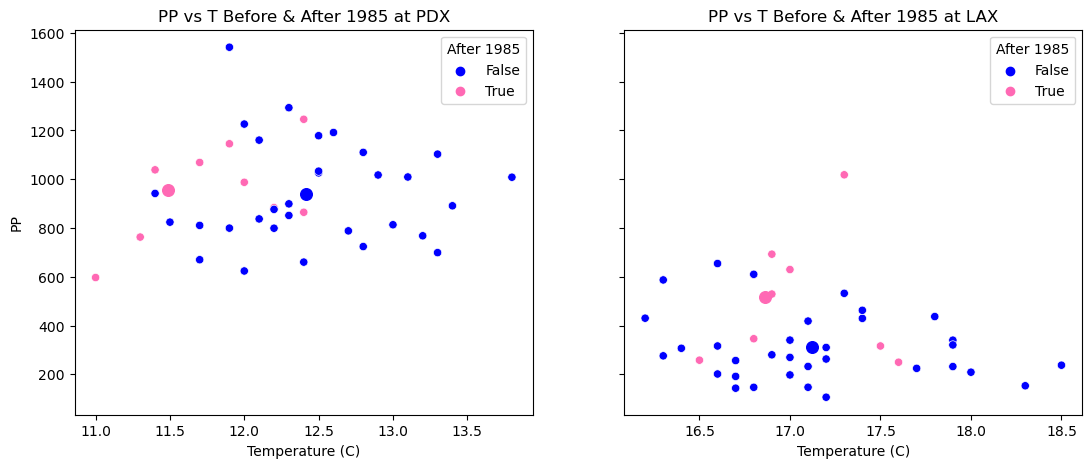

In [5]:
airport_temp['After 1985'] = [False if year>1985 else True for year in airport_temp['Year']]
pdx = airport_temp[airport_temp['Airport']=='PDX']
lax = airport_temp[airport_temp['Airport']=='LAX']

pdx_means = pdx.groupby('After 1985').agg({'T': 'mean','PP': 'mean'})
lax_means = lax.groupby('After 1985').agg({'T': 'mean','PP': 'mean'})

fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

sns.scatterplot(data=pdx, x='T', y='PP', hue='After 1985', palette=['blue', 'hotpink'], ax=axes[0])
axes[0].scatter(pdx_means['T'][0], pdx_means['PP'][0], color='blue', s=70)
axes[0].scatter(pdx_means['T'][1], pdx_means['PP'][1], color='hotpink', s=70)
axes[0].set_xlabel('Temperature (C)')
axes[0].set_title('PP vs T Before & After 1985 at PDX')

sns.scatterplot(data=lax, x='T', y='PP', hue='After 1985', palette=['blue', 'hotpink'], ax=axes[1])
axes[1].scatter(lax_means['T'][0], lax_means['PP'][0], color='blue', s=70)
axes[1].scatter(lax_means['T'][1], lax_means['PP'][1], color='hotpink', s=70)
axes[1].set_xlabel('Temperature (C)')
axes[1].set_title('PP vs T Before & After 1985 at LAX')

In general the trend we're seeing is that weather is getting more extream. In both places after 1985 averages were warmer with less rain. When you combine every city regardless of location and climate you loose the individual extreamities. Oregon and PDX is know for having a more temperate climate while getting lots of rain, however it is becoming less and less temperate. Meanwhile Southern California and LA are known to have a warmer climate with little rain, now its slightly warmer but with near drought conditions. Climate change is causing the normal climates to become more extream versions of themselves. 